Sarcasm_Headlines

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd
import collections
import matplotlib.pyplot as plt
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\benit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
df = pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines=True)
df['headline'][9]
#df.head()

'lots of parents know this scenario'

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [32]:
df.drop_duplicates(inplace=True)
df.isna().any()

is_sarcastic    False
headline        False
article_link    False
dtype: bool

In [33]:
df["is_sarcastic"].value_counts()

0    14984
1    13633
Name: is_sarcastic, dtype: int64

Remove Stopwords

In [34]:
stop = stopwords.words('english')
df['headline'] = df['headline'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) #CHTGPT

In [35]:
df['headline'][9]

'lots parents know scenario'

Stemming

In [36]:

ps = PorterStemmer()
df['headline'] = df['headline'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))

Lemmetaization

In [37]:
#Lemmetaization of df['headline']
lemmatizer = WordNetLemmatizer()
df['headline'] = df['headline'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

Data Exploration

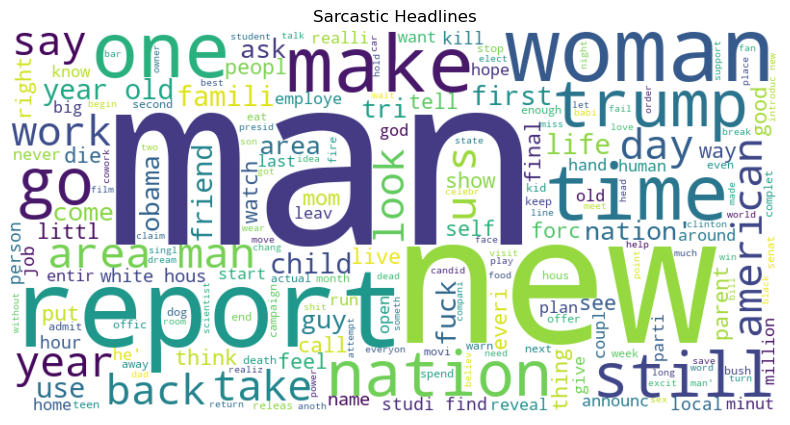

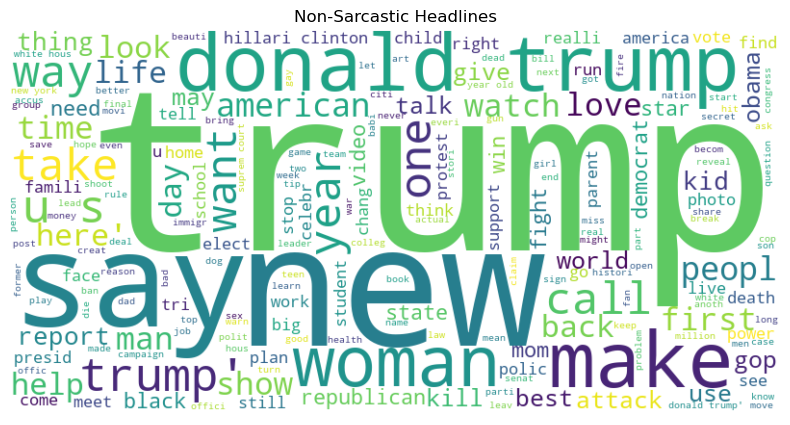

In [39]:
#CHTGPT
df_sarcastic = df[df['is_sarcastic'] == 1]
df_not_sarcastic = df[df['is_sarcastic'] == 0]

# Create a function to generate a word cloud plot
def plot_wordcloud(df_subset, title):
    # Concatenate all the headlines into a single string
    text = " ".join(headline for headline in df_subset['headline'])

    # Generate a word cloud object
    wordcloud = WordCloud(width=800, height=400, max_words=200, background_color="white").generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.savefig(title + '.png')
    plt.show()

# Generate the word cloud plot for sarcastic headlines
plot_wordcloud(df_sarcastic, "Sarcastic Headlines")

# Generate the word cloud plot for non-sarcastic headlines
plot_wordcloud(df_not_sarcastic, "Non-Sarcastic Headlines")
